<a href="https://colab.research.google.com/github/datainworld/brunch/blob/master/%EB%B8%8C%EB%9F%B0%EC%B9%98_%EA%B9%94%EB%81%94%ED%95%9C%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 구글 colab의 시각화 차트에 한글이 표시되도록 설정
import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


In [8]:
# github에 업로드한 생활인구 데이터 로딩

url = 'https://raw.githubusercontent.com/datainworld/brunch/master/defactoPop_20200110.csv'
df = pd.read_csv(url)
df.tail()

,기준일,시간대,자치구,남자0-9세,남자10-14세,남자15-19세,남자20-24세,남자25-29세,남자30-34세,남자35-39세,남자40-44세,남자45-49세,남자50-54세,남자55-59세,남자60-64세,남자65-69세,남자70세이상,여자0-9세,여자10-14세,여자15-19세,여자20-24세,여자25-29세,여자30-34세,여자35-39세,여자40-44세,여자45-49세,여자50-54세,여자55-59세,여자60-64세,여자65-69세,여자70세이상
595,20200110,23,관악구,12825.3846,6303.7887,10435.8129,22599.7081,38354.4437,30143.4747,24555.6542,19415.6827,20342.0430,15101.6015,15625.6297,13099.6672,10306.8814,22154.8935,12762.2430,6196.3016,10571.5074,29988.0464,35519.3672,25057.8307,21134.9205,16783.1555,17041.5259,16196.4872,18914.3675,16815.0188,13978.9722,32942.2725
596,20200110,23,서초구,17681.5805,9895.9070,14078.3979,15768.0472,20937.5030,20313.8453,23574.0856,23261.9910,26203.0604,18972.1735,16909.1735,13785.9216,10374.0336,20369.1257,18872.5714,10522.7484,15170.9948,19312.8140,22214.9512,21193.4109,24124.4116,22439.2708,23231.5577,17434.8267,17582.6392,16260.3127,12740.2277,30917.6213
597,20200110,23,강남구,22124.6916,14867.6851,22847.6342,20217.1995,30511.9706,31350.6809,37314.4357,34681.8735,36527.2182,26905.6607,22087.5129,17349.8528,13241.5272,25822.1574,21600.2011,13851.2300,22798.7334,27492.9460,34859.9557,32628.3475,34317.8506,32099.9577,32465.5273,22596.0732,22222.8324,20837.7820,16093.9251,38544.7034
598,20200110,23,송파구,29842.0973,15345.2046,20109.7011,19083.9734,27158.3584,29203.4686,35682.8132,31376.1388,32235.8017,26062.5853,27142.8222,23066.3221,16913.5956,29167.1865,29381.4908,15518.7011,20128.9512,23985.1876,30479.3646,33219.1966,36768.9255,31104.7294,32588.7427,27707.4163,31603.5384,28546.1135,20686.2282,44241.4844
599,20200110,23,강동구,21151.6827,11319.1389,14551.8029,13201.7070,16441.9156,17457.4069,21386.7071,20526.4204,21573.6088,17945.2908,19732.1537,17093.8262,12539.5428,23405.5739,18596.0557,9636.8446,13532.1032,15286.8123,17581.5612,18642.2750,22447.6797,20918.6385,21793.9770,19601.3379,23662.1516,21476.3870,15970.9194,34723.8812


In [9]:
# pandas의 melt()를 이용하여 행(row) 중심의 tidy data로 변형

df_pop = pd.melt(df,['기준일', '시간대', '자치구'], var_name='성별연령대', value_name='인구')
df_pop

,기준일,시간대,자치구,성별연령대,인구
0,20200110,0,종로구,남자0-9세,5194.8519
1,20200110,0,중구,남자0-9세,3746.8902
2,20200110,0,용산구,남자0-9세,7316.2706
3,20200110,0,성동구,남자0-9세,12636.7367
4,20200110,0,광진구,남자0-9세,11714.3512
...,...,...,...,...,...
16795,20200110,23,관악구,여자70세이상,32942.2725
16796,20200110,23,서초구,여자70세이상,30917.6213
16797,20200110,23,강남구,여자70세이상,38544.7034
16798,20200110,23,송파구,여자70세이상,44241.4844


In [10]:
# '성별연령대' 컬럼에서 '성별'과 '연령대' 컬럼을 추출하여 생성

df_pop['성별'] = df_pop['성별연령대'].str.slice(stop=2)
df_pop['연령대'] = df_pop['성별연령대'].str.slice(start=2)
df_pop

,기준일,시간대,자치구,성별연령대,인구,성별,연령대
0,20200110,0,종로구,남자0-9세,5194.8519,남자,0-9세
1,20200110,0,중구,남자0-9세,3746.8902,남자,0-9세
2,20200110,0,용산구,남자0-9세,7316.2706,남자,0-9세
3,20200110,0,성동구,남자0-9세,12636.7367,남자,0-9세
4,20200110,0,광진구,남자0-9세,11714.3512,남자,0-9세
...,...,...,...,...,...,...,...
16795,20200110,23,관악구,여자70세이상,32942.2725,여자,70세이상
16796,20200110,23,서초구,여자70세이상,30917.6213,여자,70세이상
16797,20200110,23,강남구,여자70세이상,38544.7034,여자,70세이상
16798,20200110,23,송파구,여자70세이상,44241.4844,여자,70세이상


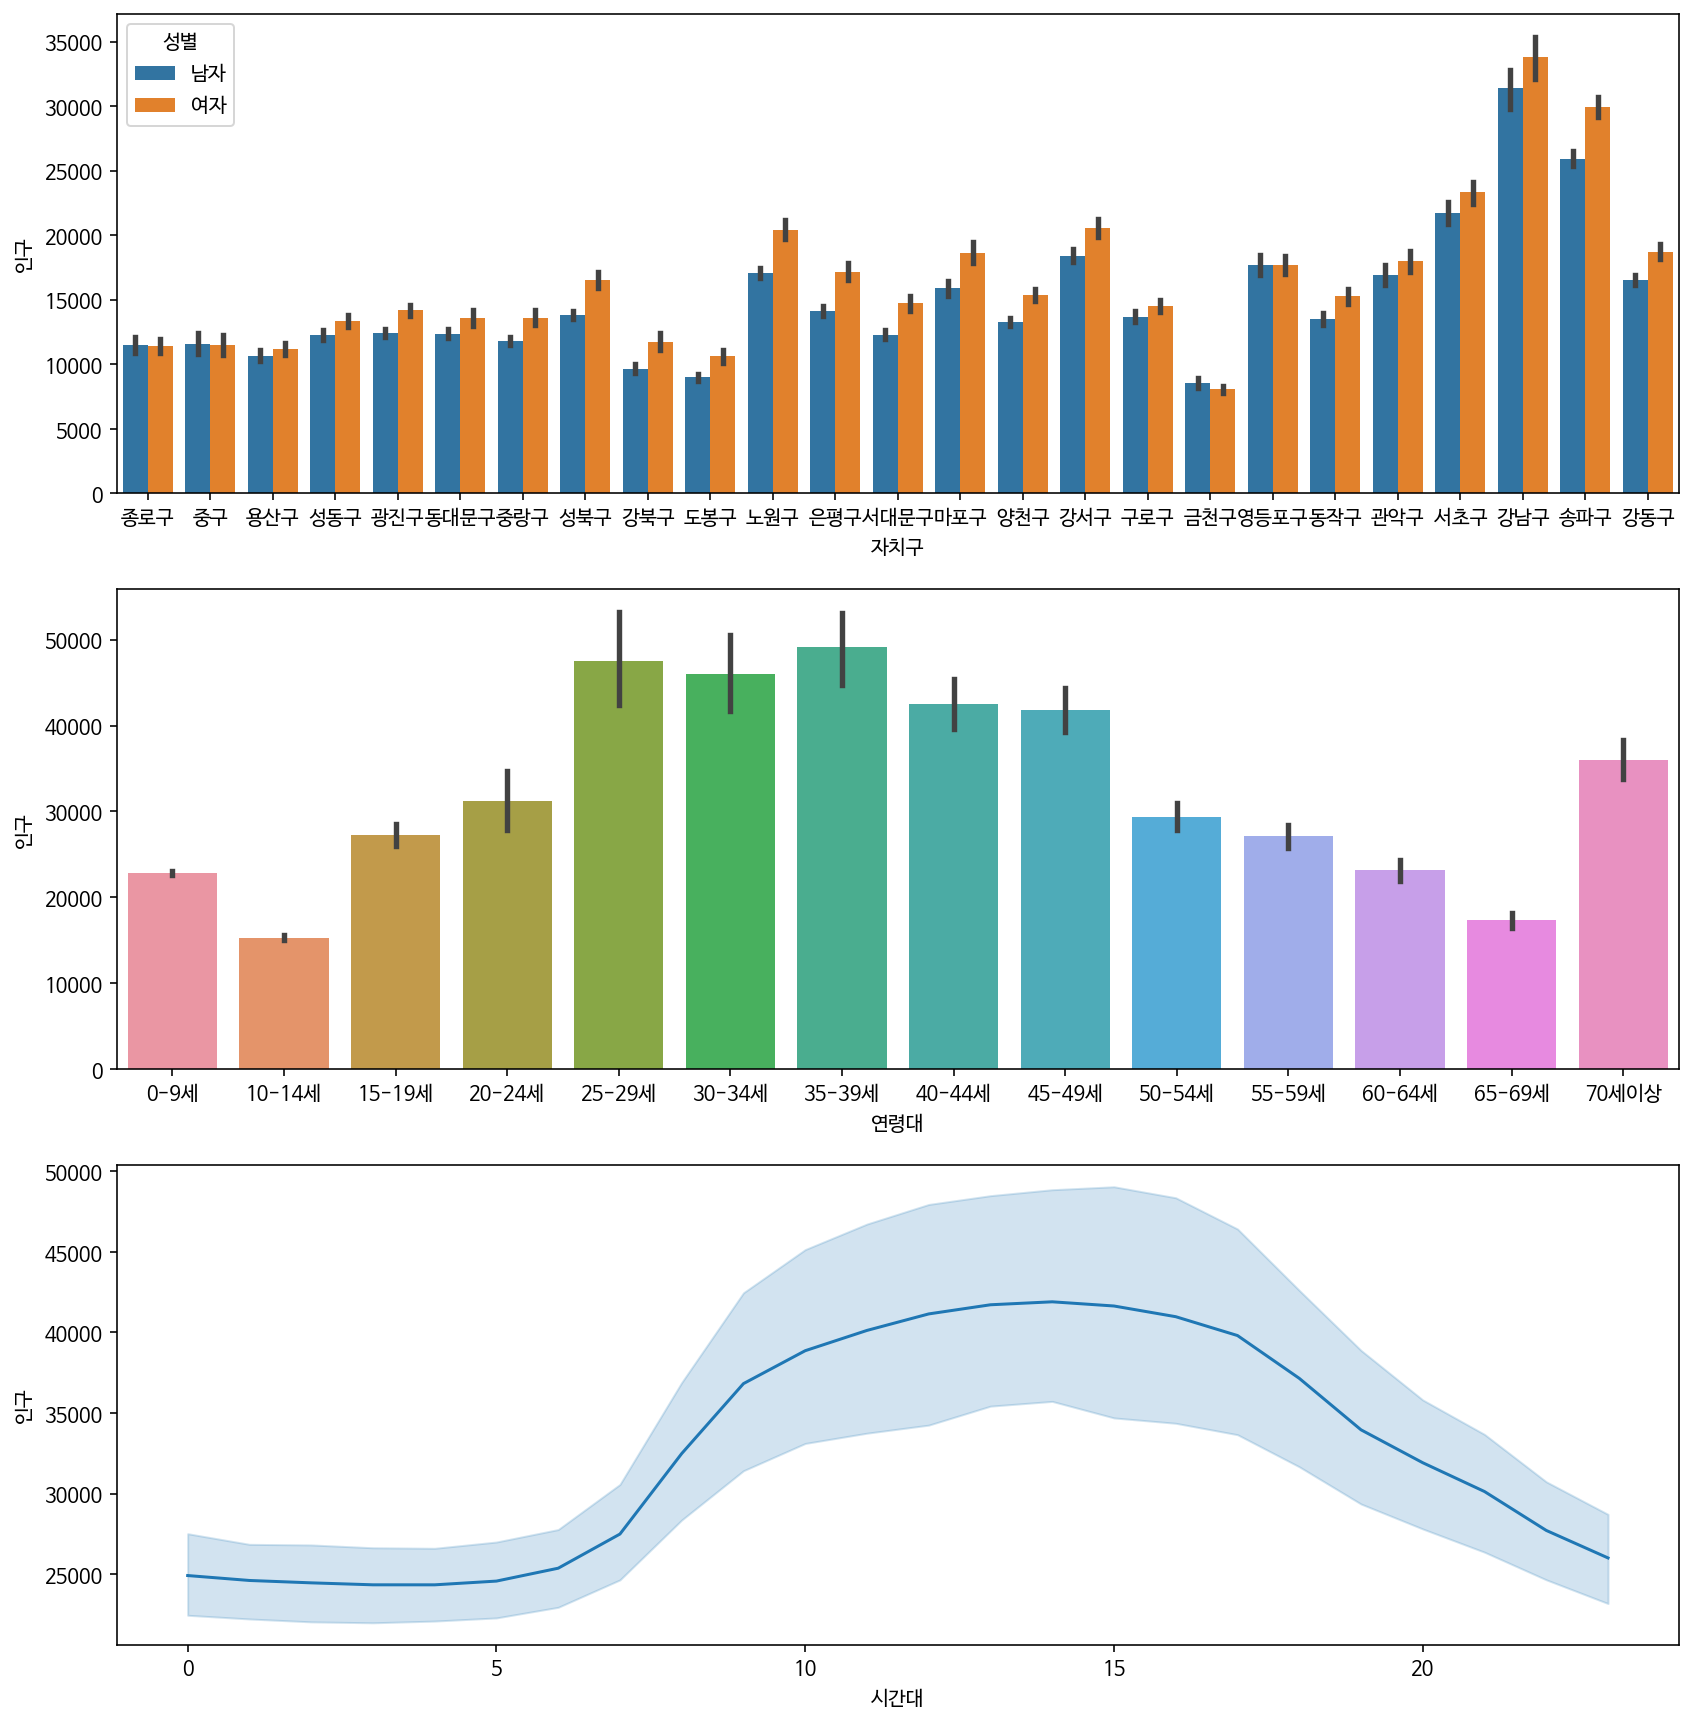

In [11]:
# seaborn을 이용하여 생활인구 데이터 시각화

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,15))
sns.barplot(x='자치구', y='인구', hue='성별', ax=ax1, data=df_pop)
sns.barplot(x='연령대', y='인구', ax=ax2, data=df_pop[df_pop['자치구'] == '강남구'])
sns.lineplot(x='시간대', y='인구', ax=ax3, data=df_pop[df_pop['자치구'] == '강남구'])